## K-Nearest Neighbors (KNN)

Problem Statement

We are using Biomechanical features of orthopedic patients as a dataset. We need to Classify patients based on given six features.Task consists in classifying patients as belonging to one out of two categories: Normal (100 patients) or Abnormal (210 patients).

Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

pelvic incidence
pelvic tilt
lumbar lordosis angle
sacral slope
pelvic radius

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
df =pd.read_csv("column_2C_weka.csv")

In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## EDA

In [5]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [7]:
df.shape

(310, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [9]:
df['class'].value_counts()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

### Data visualization

class
Abnormal    [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
Normal      [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
dtype: object

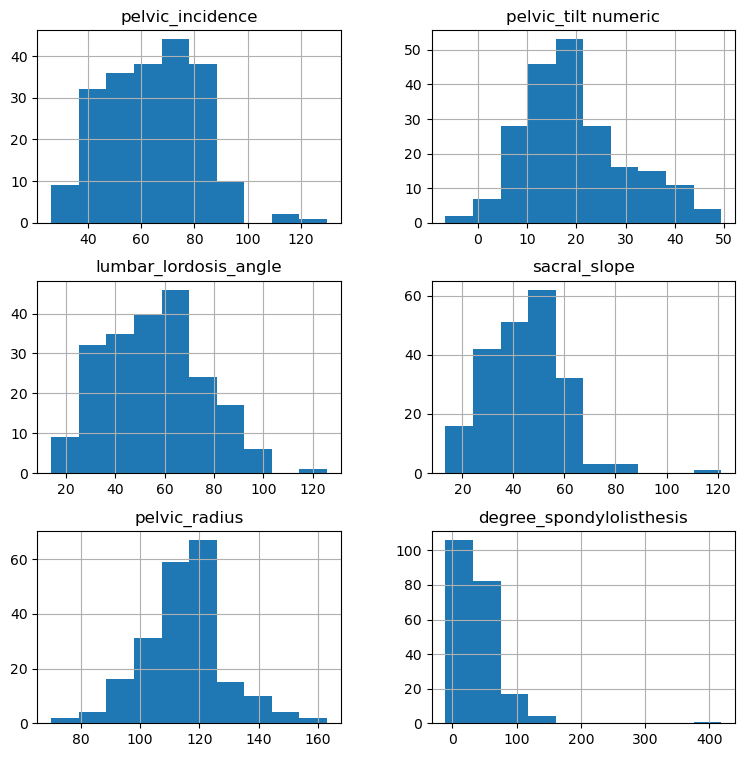

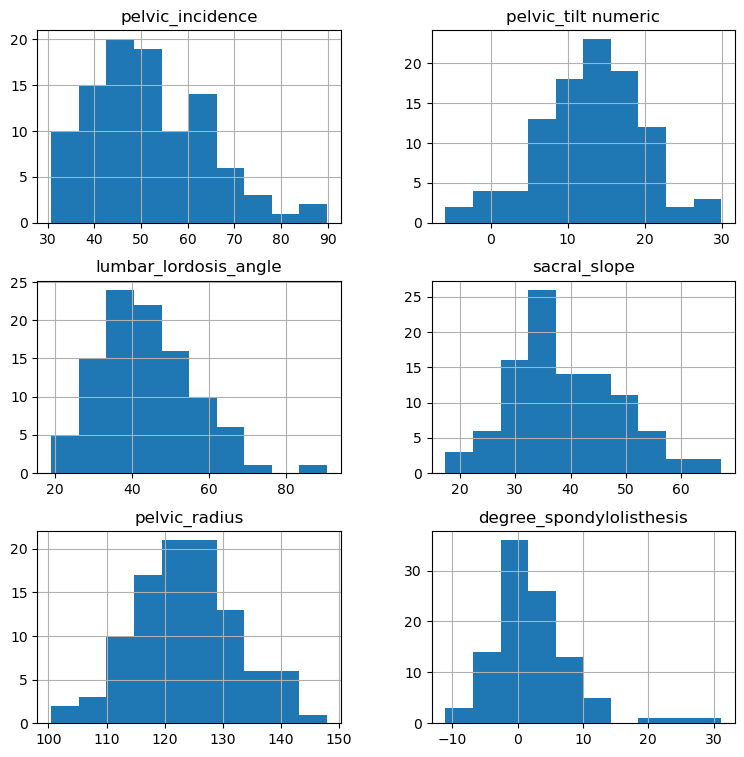

In [4]:
df.groupby('class').hist(figsize=(9, 9))

### Feature Scaling


**Standarisation Method MinMaxScaler**

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

where min, max = feature_range.

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
x = df.drop('class', axis = 1)

In [23]:
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [24]:
y = df['class']

In [25]:
y.head()

0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: class, dtype: object

In [26]:
x = pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


### Test-train split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0 )

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(232, 6)
(78, 6)
(232,)
(78,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

### Model fit and training

In [31]:
acc_val = [] #to store accuracy score
for K in range(30):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred= model.predict(x_test) #make prediction on test set
    accuracy = model.score(x_test,y_test) #calculate accuracy
    acc_val.append(accuracy) #store rmse values
    print('Accuracy Score for k= ' , K , 'is:', accuracy)

Accuracy Score for k=  1 is: 0.7307692307692307
Accuracy Score for k=  2 is: 0.7692307692307693
Accuracy Score for k=  3 is: 0.7564102564102564
Accuracy Score for k=  4 is: 0.7692307692307693
Accuracy Score for k=  5 is: 0.7692307692307693
Accuracy Score for k=  6 is: 0.782051282051282
Accuracy Score for k=  7 is: 0.8076923076923077
Accuracy Score for k=  8 is: 0.8205128205128205
Accuracy Score for k=  9 is: 0.8076923076923077
Accuracy Score for k=  10 is: 0.8076923076923077
Accuracy Score for k=  11 is: 0.8076923076923077
Accuracy Score for k=  12 is: 0.782051282051282
Accuracy Score for k=  13 is: 0.7692307692307693
Accuracy Score for k=  14 is: 0.7564102564102564
Accuracy Score for k=  15 is: 0.7564102564102564
Accuracy Score for k=  16 is: 0.782051282051282
Accuracy Score for k=  17 is: 0.7564102564102564
Accuracy Score for k=  18 is: 0.7564102564102564
Accuracy Score for k=  19 is: 0.7307692307692307
Accuracy Score for k=  20 is: 0.7435897435897436
Accuracy Score for k=  21 is: 0.

<Axes: title={'center': 'Plotting Accuracy for different K values'}>

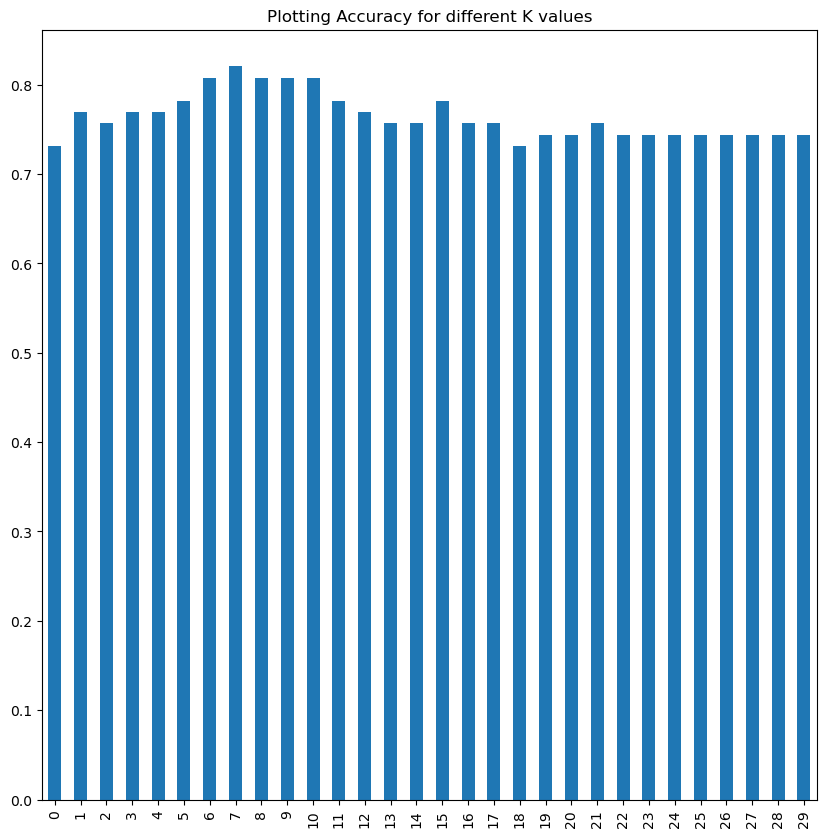

In [32]:
curve = pd.DataFrame(acc_val) 
curve.plot(kind = 'bar',figsize=(10,10), title = "Plotting Accuracy for different K values", legend =  False)

In [33]:
final_model = KNeighborsClassifier(n_neighbors = 8)
final_model.fit(x_train, y_train)  #fit the model
    
y_pred= final_model.predict(x_test) #make prediction on test set

### Evaluation

In [34]:
print ('Accuracy from sk-learn: {0}'.format(final_model.score(x_test, y_test)))

Accuracy from sk-learn: 0.8205128205128205


In [35]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=["Abnormal", "Normal"])

# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred,labels=["Abnormal", "Normal"]))

              precision    recall  f1-score   support

    Abnormal       0.87      0.87      0.87        54
      Normal       0.71      0.71      0.71        24

    accuracy                           0.82        78
   macro avg       0.79      0.79      0.79        78
weighted avg       0.82      0.82      0.82        78



In [36]:
data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

df_check = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

In [37]:
df_check.head()

,y_Actual,y_Predicted
300,Normal,Normal
145,Abnormal,Abnormal
302,Normal,Abnormal
222,Normal,Abnormal
52,Abnormal,Abnormal


Text(0.5, 427.9555555555555, 'Predicted label')

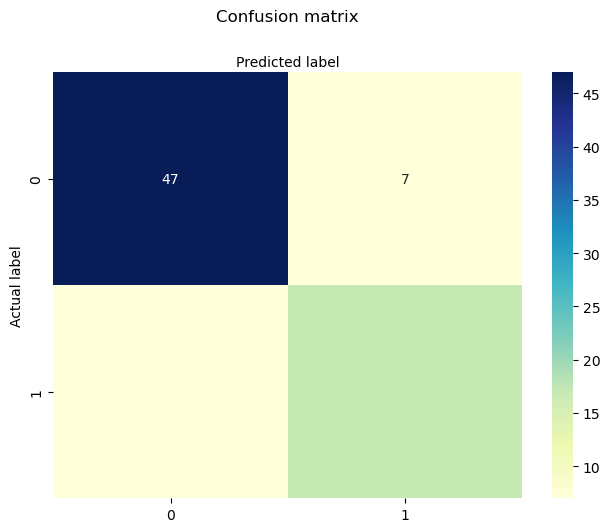

In [38]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')